<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#My-ideia:" data-toc-modified-id="My-ideia:-1">My ideia:</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-1.1">1</a></span></li><li><span><a href="#2" data-toc-modified-id="2-1.2">2</a></span></li><li><span><a href="#1" data-toc-modified-id="1-1.3">1</a></span></li></ul></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-2">Train model</a></span><ul class="toc-item"><li><span><a href="#--First-normal-xgb" data-toc-modified-id="--First-normal-xgb-2.1">- First normal xgb</a></span></li></ul></li></ul></div>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import sys                                                                                                                         
from utils import read_data, process_time, merge_data                           

In [5]:
infos, items, orders = read_data(data_dir='../../main/datasets/')                    

In [6]:
infos.head(20)

,itemID,simulationPrice,promotion
0,1,3.43,NaN
1,2,9.15,NaN
2,3,14.04,NaN
3,4,14.10,NaN
4,5,7.48,NaN
5,6,17.25,NaN
6,7,34.39,NaN
7,8,4.98,NaN
8,9,199.84,NaN
9,10,24.17,NaN


In [7]:
items.head(20)

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
5,6,0,2,4.20,1,2,1,20.90
6,7,0,3,4.00,1,3,1,26.40
7,8,0,4,5.00,1,1,1,14.13
8,9,0,5,5.00,1,1,1,165.06
9,10,0,4,5.00,1,1,1,19.43


In [8]:
print(orders.shape)
orders.head(20)

(2181955, 5)


,time,transactID,itemID,order,salesPrice
0,2018-01-01 00:01:56,2278968,450,1,17.42
1,2018-01-01 00:01:56,2278968,83,1,5.19
2,2018-01-01 00:07:11,2255797,7851,2,20.47
3,2018-01-01 00:09:24,2278968,450,1,17.42
4,2018-01-01 00:09:24,2278968,83,1,5.19
5,2018-01-01 00:39:26,2257125,9375,1,31.02
6,2018-01-01 00:51:59,2278968,450,1,17.42
7,2018-01-01 00:51:59,2278968,83,1,5.19
8,2018-01-01 00:51:59,2278968,19,1,77.64
9,2018-01-01 00:51:59,2278968,297,1,43.53


In [9]:
df = merge_data(orders, items, infos)
process_time(df)  # Modifies in place  

In [10]:
print(df.shape)
df.head(20)       

(2181955, 18)


,time,transactID,itemID,order,salesPrice,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,simulationPrice,promotion,days,days_backwards,week_backwards,group_backwards
0,2018-01-01 00:01:56,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,1,180,26,13
1,2018-01-01 00:09:24,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,1,180,26,13
2,2018-01-01 00:51:59,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,1,180,26,13
3,2018-01-01 00:56:54,2278968,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,1,180,26,13
4,2018-01-15 17:48:57,78321,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,15,166,24,12
5,2018-02-27 20:42:53,2265457,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,58,123,18,9
6,2018-04-16 21:17:53,2273849,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,106,75,11,6
7,2018-05-01 22:11:29,2282962,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,121,60,9,5
8,2018-05-16 23:21:11,2275180,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,136,45,7,4
9,2018-05-16 23:31:56,2262352,450,1,17.42,0,7,0.0,1,2,1,27.0,17.42,NaN,136,45,7,4


In [11]:
# Since data is ordered by time, this works:
first_pair_week_item = df.groupby(["itemID"])["group_backwards"].first()
first_pair_week_item.head(20)

itemID
1     12
2      9
3     13
4     12
5     13
6     10
7     11
8     12
9     13
10    10
11    13
12    13
13    11
14    12
15    13
16    12
17    12
18    13
19    13
20    13
Name: group_backwards, dtype: int64

In [12]:
for pair_week in range(13, 0, -1):
    group = df.query("group_backwards == @pair_week")
    total = group["order"].sum()
    total_revenue = (group["salesPrice"]*group["order"]).sum()

    new_items = first_pair_week_item[first_pair_week_item == pair_week].index
    new_items_total = group.loc[group["itemID"].isin(new_items), "order"].sum()
    new_items_revenue = group.loc[group["itemID"].isin(new_items), ["order", "salesPrice"]]
    new_items_revenue  = (new_items_revenue["order"]*new_items_revenue["salesPrice"]).sum()

    print("group backwards:", pair_week, 
          "\tamount of new items", len(new_items), 
         # "\n",
          "\t% of sales new items:", f"{100*new_items_total/total:.2f} %",
         "\t% of revenue new items:", f"{100*new_items_revenue/total_revenue:.2f}, %",
         #"\n\n"
         )
print("New items in DMC test", len(items)-df["itemID"].nunique())

group backwards: 13 	amount of new items 1431 	% of sales new items: 100.00 % 	% of revenue new items: 100.00, %
group backwards: 12 	amount of new items 729 	% of sales new items: 42.80 % 	% of revenue new items: 56.79, %
group backwards: 11 	amount of new items 371 	% of sales new items: 28.23 % 	% of revenue new items: 36.18, %
group backwards: 10 	amount of new items 533 	% of sales new items: 36.82 % 	% of revenue new items: 41.80, %
group backwards: 9 	amount of new items 785 	% of sales new items: 47.24 % 	% of revenue new items: 52.29, %
group backwards: 8 	amount of new items 909 	% of sales new items: 52.43 % 	% of revenue new items: 48.72, %
group backwards: 7 	amount of new items 716 	% of sales new items: 42.38 % 	% of revenue new items: 45.98, %
group backwards: 6 	amount of new items 661 	% of sales new items: 37.07 % 	% of revenue new items: 40.05, %
group backwards: 5 	amount of new items 785 	% of sales new items: 46.28 % 	% of revenue new items: 45.09, %
group backwa

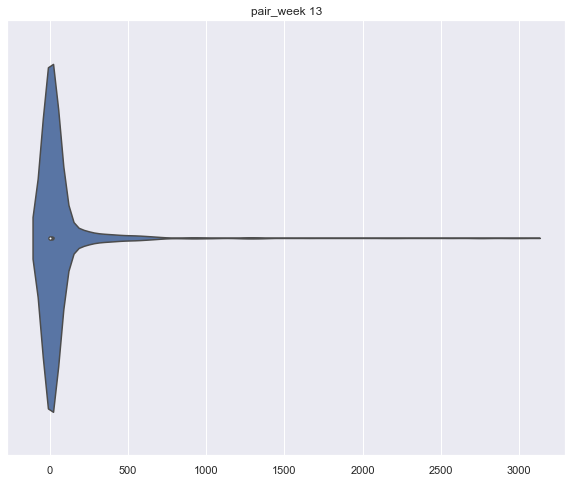

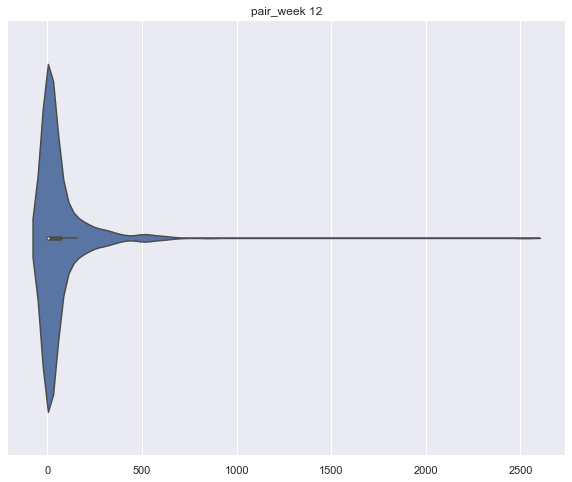

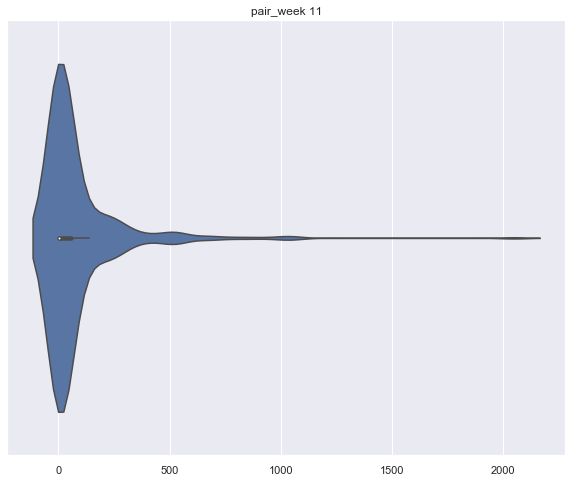

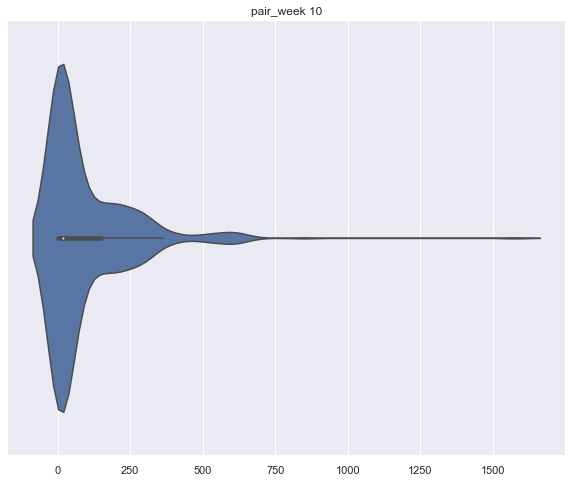

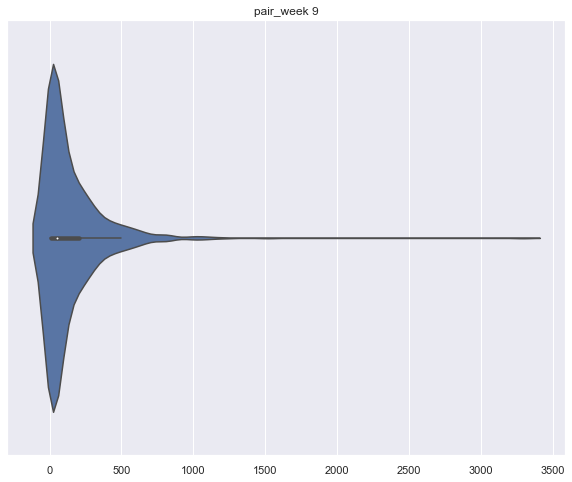

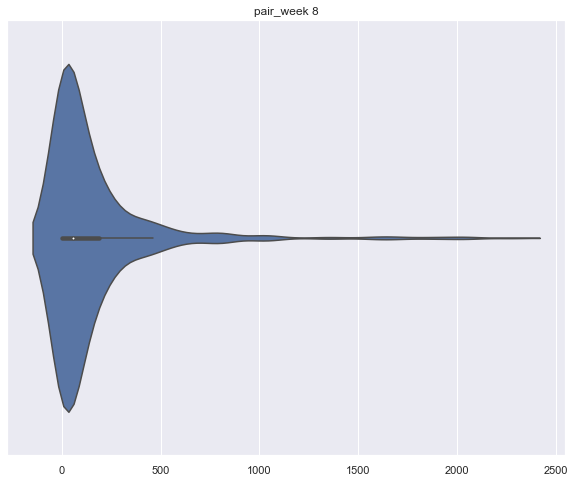

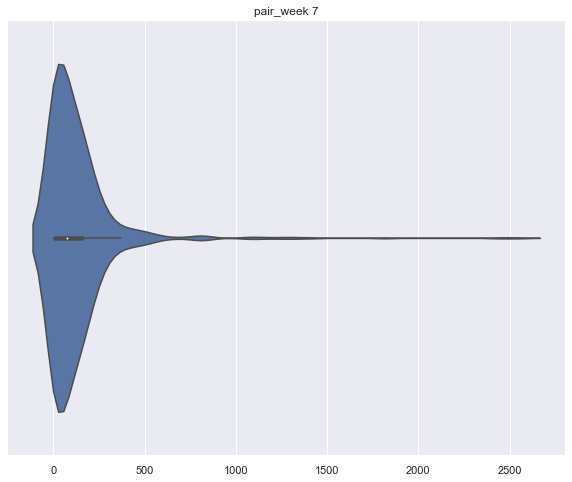

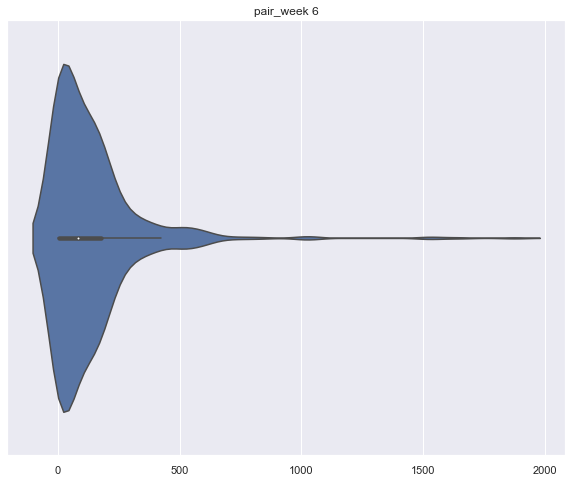

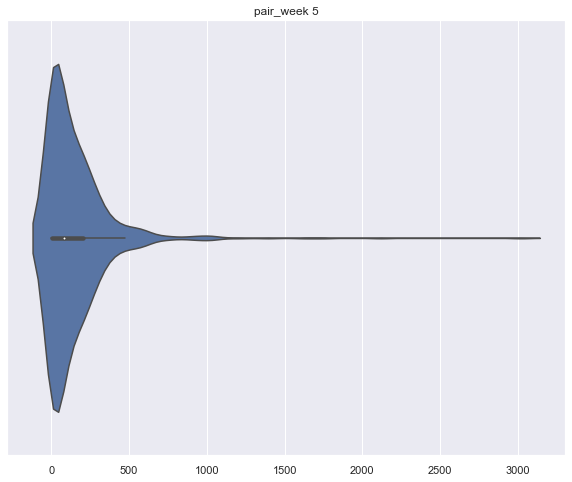

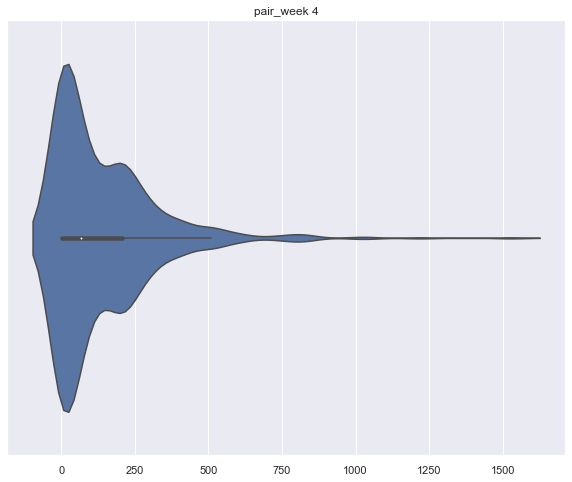

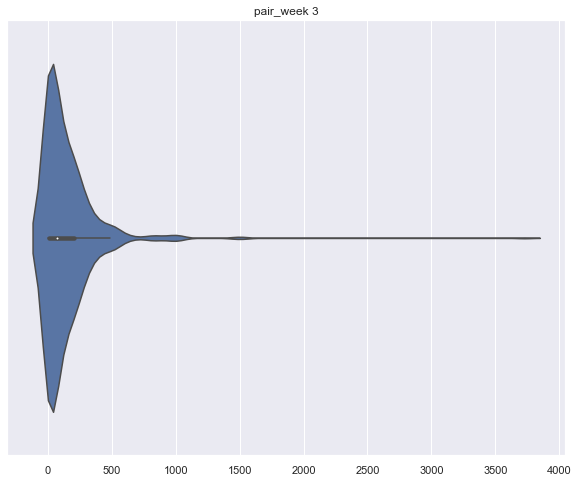

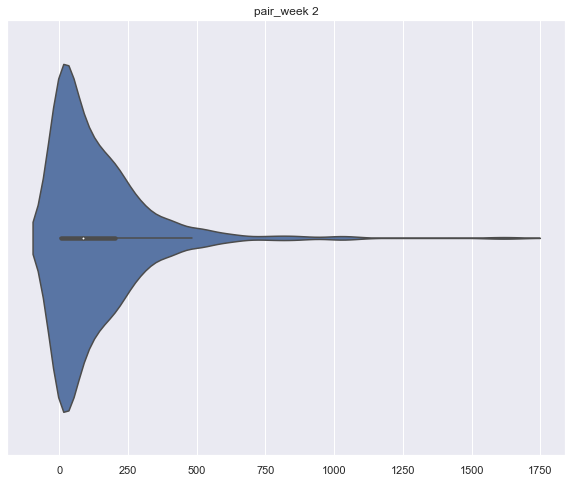

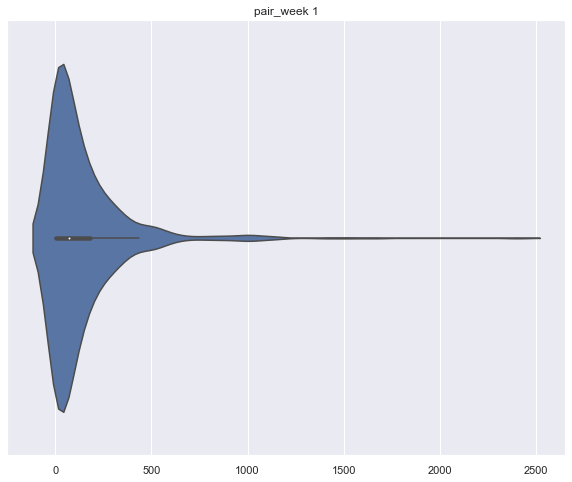

In [13]:
for pair_week in range(13, 0, -1):
    group = df.query("group_backwards == @pair_week")
    total = group["order"].sum()

    new_items = first_pair_week_item[first_pair_week_item == pair_week].index
    new_items_counts = group.loc[group["itemID"].isin(new_items)]
    new_items_counts = new_items_counts.groupby("itemID")["order"].sum().values
    pl = sns.violinplot(new_items_counts)
    plt.title(f"pair_week {pair_week}")
    plt.savefig(f'pair_week_{pair_week}.png', bbox_inches='tight')
    plt.show()

In [14]:
from tabulate import tabulate

In [15]:
for pair_week in range(13, 0, -1):
    group = df.query("group_backwards == @pair_week")
    total = group["order"].sum()

    new_items = first_pair_week_item[first_pair_week_item == pair_week].index
    new_items_counts = group.loc[group["itemID"].isin(new_items)]
    new_items_counts = new_items_counts.groupby("itemID")["order"].sum()
    print(f"pair_week {pair_week}")
    print(tabulate(pd.DataFrame(new_items_counts.describe())))
    print("\n\n")

pair_week 13
-----  ---------
count  1431
mean     60.4913
std     235.209
min       1
25%       1
50%       3
75%      13
max    3022
-----  ---------



pair_week 12
-----  ---------
count   729
mean     63.4678
std     148.621
min       1
25%       1
50%       4
75%      64
max    2523
-----  ---------



pair_week 11
-----  ---------
count   371
mean     80.5067
std     192.055
min       1
25%       1
50%       4
75%      58
max    2049
-----  ---------



pair_week 10
-----  ---------
count   533
mean     94.1351
std     153.654
min       1
25%       1
50%      20
75%     149
max    1575
-----  ---------



pair_week 9
-----  --------
count   785
mean    141.001
std     225.788
min       1
25%       8
50%      52
75%     203
max    3290
-----  --------



pair_week 8
-----  --------
count   909
mean    155.911
std     288.306
min       1
25%       2
50%      56
75%     189
max    2269
-----  --------



pair_week 7
-----  --------
count   716
mean    125.041
std     215.195
min   

Therefore, around 35% of a fortnight sales is NEW ITEMS.

That is, items that never appeared in the dataset until now. Aproximately the same thing should happen for DMC (maybe a bit less)

---

<br>
<br>
<br>
<br>
<br>
<br>

# My ideia:

- Divide into TWO seperate problems:
    - 1) Predict the amount of items already seen with tradional approach
    - 2) Predict new items with a model dedicated to new items ONLY for our test fortnight.
- This is further broken down into:

## 1
- Use a binary classifier to first find out if a item sold or not (given that it's not completely new)
- If it sold, use normal model with good features (Tobias, Sasaki, Dora)
- Otherwise, predict 0.

We will start from group backwards 11 (first data will be 10, since for 11 all null)

## 2
- Make it work somehow: start off with easy stats.

Let's go!

---

<br>

## 1

In [16]:
def create_dataset(target_week, final_test=False):
    if final_test:
        train_items = df.query('(@target_week + 1) <= group_backwards <= 13')["itemID"].unique()
        full = df.query('group_backwards >= (@target_week)').reset_index(drop = True)
    else:
        train_items = df.query('(@target_week + 2) <= group_backwards <= 13')["itemID"].unique()
        full = df.query('group_backwards >= (@target_week)').reset_index(drop = True)
    # only return instances where that item has already appeared.
    full = full.query("itemID in @train_items")

    return full

#full_val = create_dataset(2)
full_sub  = create_dataset(1, final_test=True)

# ok, so the proper is the way above, but this is SHIT, but turns out the other version
# is good *m
full_sub  = create_dataset(0, final_test=True)

In [17]:
X_full_val = pd.DataFrame(
    index=pd.MultiIndex.from_product([
        full_sub["itemID"].unique(), 
        range(13, 0, -1)
    ], names=["itemID", "group_backwards"]
)).reset_index()

In [18]:
X_full_val = pd.merge(X_full_val, items, left_on="itemID", right_on="itemID", validate="m:1")
X_full_val .head()

,itemID,group_backwards,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,450,13,0,7,0.0,1,2,1,27.0
1,450,12,0,7,0.0,1,2,1,27.0
2,450,11,0,7,0.0,1,2,1,27.0
3,450,10,0,7,0.0,1,2,1,27.0
4,450,9,0,7,0.0,1,2,1,27.0


**OBS**: From now on, salesPrice and order in X_train means the SUM

**OBS**: We remove it when defining x/y later on.

In [19]:
cols = ["order", "salesPrice"]
extra = full_sub.groupby(["group_backwards", "itemID"], 
                     as_index=False)[cols].sum()


X_full_val = pd.merge(X_full_val, extra, on=["group_backwards", "itemID"], how="left",
                  validate="1:1")

# 0 so the features generated will make sense
X_full_val.fillna(0, inplace=True)
X_full_val.tail()

,itemID,group_backwards,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,order,salesPrice
127915,9796,5,243,252,0.0,8,44,8,80.54,0.0,0.00
127916,9796,4,243,252,0.0,8,44,8,80.54,0.0,0.00
127917,9796,3,243,252,0.0,8,44,8,80.54,0.0,0.00
127918,9796,2,243,252,0.0,8,44,8,80.54,0.0,0.00
127919,9796,1,243,252,0.0,8,44,8,80.54,1.0,159.82


In [20]:
# X_full_val.loc[X_full_val["group_backwards"] == 1, "order"].sum()

---

<br>

Brute force some features

In [21]:
def feat_amount_sold(groupby):
    return groupby["order"].sum()

def feat_value(groupby):
    return groupby["salesPrice"].sum()

def amount_of_transactions():
    return groupby.size()

func_feats_past_time = {
     "quantidade_vend_sum_{}": feat_amount_sold,
     "valor_vend_sum_{}": feat_value,
}

# These are features generated only from the last 14 days. Currently it's the same,
# but who knows.
func_feats_past_fortnight = {
     "quantidade_vend_sum_{}": feat_amount_sold,
     "valor_vend_sum_{}": feat_value,
}

# TODO
#func_feats_other = {
#     "quantidade_trans_sum": amount_of_transactions,
#}

In [22]:
def apply_all_item_feats(X, past_time, func_feats):
    """Only works for data that hasnt been grouped! ie, "Orders" like.
    
    Calculates features that depend on the item ID and it's derivatives
    """
    cols = ["itemID", "brand", "manufacturer", "category1", "category2", "category3"]
    # All theses columns above depend only on the item, so we can just get the first
    feats = X.groupby(["itemID"]).first()

    for col in cols:
        groupby = X.loc[past_time].groupby(col)
        for name, func in func_feats.items():
            feat = func(groupby)
            feats = pd.merge(feats, feat.rename(name.format(col)),
                               left_on=col, right_index=True)

    return feats.drop(columns=X.loc[past_time].columns.drop("itemID"),
                         errors="ignore")
        

In [23]:
# Test the features:
temp = X_full_val.query("group_backwards >= 12").index
temp_results = apply_all_item_feats(X_full_val, temp, func_feats_past_time)

# temp_results.head()
temp_results.loc[[450, 108, 10224]]

,quantidade_vend_sum_itemID,valor_vend_sum_itemID,quantidade_vend_sum_brand,valor_vend_sum_brand,quantidade_vend_sum_manufacturer,valor_vend_sum_manufacturer,quantidade_vend_sum_category1,valor_vend_sum_category1,quantidade_vend_sum_category2,valor_vend_sum_category2,quantidade_vend_sum_category3,valor_vend_sum_category3
itemID,,,,,,,,,,,,
450,5.0,87.1,110886.0,3239111.22,1894.0,26734.23,29725.0,1909256.02,860.0,14218.21,29725.0,1909256.02
108,0.0,0.0,110886.0,3239111.22,68.0,8744.88,29725.0,1909256.02,10528.0,723823.40,29725.0,1909256.02
10224,0.0,0.0,320.0,509777.40,362.0,514509.01,7095.0,1597644.89,4885.0,1476672.36,7096.0,1597830.09


In [24]:
def generate_all(X, stop_week, start_fortnight):
    new_X = X.copy()
    new_past_cols = None

    # Start off with 12 because we don't generate data for the first fortnight due to time lag.
    for fortnight in range(start_fortnight, stop_week-1, -1):
        # here is the line that COULD BE LEAK if we >=
        past_time = X["group_backwards"] > fortnight
        
        this_fortnight = X["group_backwards"] == fortnight
    
        feats = apply_all_item_feats(X, past_time, func_feats_past_time)
        # if fortnight == stop_week: return feats
        if new_past_cols is None:
            new_past_cols = feats.columns
            for col in new_past_cols:
                new_X[col] = np.nan
        # Kind of bad, I know. There is a way a better way, but I want to sleep.
        merged = pd.merge(X.loc[this_fortnight], feats, on="itemID", validate="m:1",
                         how="left")
        new_X.loc[this_fortnight, new_past_cols] = merged[new_past_cols].values

    return new_X

In [25]:
stop_week = 1
start_fortnight = 8
#start_fortnight = 5
X_full_val_feats = generate_all(X_full_val, stop_week, start_fortnight)
X_full_val_feats = X_full_val_feats.query("group_backwards <= @start_fortnight")

In [26]:
X_full_val_feats.head(6)

,itemID,group_backwards,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,order,salesPrice,quantidade_vend_sum_itemID,valor_vend_sum_itemID,quantidade_vend_sum_brand,valor_vend_sum_brand,quantidade_vend_sum_manufacturer,valor_vend_sum_manufacturer,quantidade_vend_sum_category1,valor_vend_sum_category1,quantidade_vend_sum_category2,valor_vend_sum_category2,quantidade_vend_sum_category3,valor_vend_sum_category3
5,450,8,0,7,0.0,1,2,1,27.0,0.0,0.00,6.0,104.52,358269.0,10068432.06,4896.0,84675.62,74977.0,4849177.40,1570.0,33287.11,74977.0,4849177.40
6,450,7,0,7,0.0,1,2,1,27.0,0.0,0.00,6.0,104.52,525059.0,13463192.50,6819.0,160438.47,92277.0,6039132.82,2580.0,59668.85,92277.0,6039132.82
7,450,6,0,7,0.0,1,2,1,27.0,1.0,17.42,6.0,104.52,630286.0,15994492.97,7459.0,173819.59,108776.0,7042144.20,2808.0,64899.92,108776.0,7042144.20
8,450,5,0,7,0.0,1,2,1,27.0,1.0,17.42,7.0,121.94,748541.0,19189924.48,9471.0,205504.01,123512.0,8116196.20,3373.0,71024.57,123512.0,8116196.20
9,450,4,0,7,0.0,1,2,1,27.0,153.0,2438.80,8.0,139.36,902119.0,23178106.05,10393.0,228790.02,154825.0,9889308.26,5125.0,122941.99,154825.0,9889308.26
10,450,3,0,7,0.0,1,2,1,27.0,1.0,17.42,161.0,2578.16,1033035.0,26091320.92,12317.0,287582.70,172529.0,11124570.37,6550.0,162397.72,172529.0,11124570.37


In [27]:
X_full_val_feats.tail()

,itemID,group_backwards,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice,order,salesPrice,quantidade_vend_sum_itemID,valor_vend_sum_itemID,quantidade_vend_sum_brand,valor_vend_sum_brand,quantidade_vend_sum_manufacturer,valor_vend_sum_manufacturer,quantidade_vend_sum_category1,valor_vend_sum_category1,quantidade_vend_sum_category2,valor_vend_sum_category2,quantidade_vend_sum_category3,valor_vend_sum_category3
127915,9796,5,243,252,0.0,8,44,8,80.54,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,46808.0,8864751.84,32883.0,7933760.77,46820.0,8866974.24
127916,9796,4,243,252,0.0,8,44,8,80.54,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,53951.0,9953030.27,37524.0,8859999.21,53963.0,9955252.67
127917,9796,3,243,252,0.0,8,44,8,80.54,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,65288.0,11710754.55,44628.0,10256521.30,65300.0,11712976.95
127918,9796,2,243,252,0.0,8,44,8,80.54,0.0,0.00,0.0,0.0,552.0,68581.27,552.0,68581.27,76764.0,13675791.56,50788.0,11886677.67,76776.0,13678013.96
127919,9796,1,243,252,0.0,8,44,8,80.54,1.0,159.82,0.0,0.0,663.0,73267.41,663.0,73267.41,93055.0,15474011.89,62092.0,13433419.96,93067.0,15476234.29


In [28]:
# Since we filled missing orders/sales price with 0, impossible to have NaN
X_full_val_feats.isna().sum().sum()

0

# Train model

In [29]:
full_train = X_full_val_feats.query("group_backwards > 1")
train = X_full_val_feats.query("group_backwards > 2")
val = X_full_val_feats.query("group_backwards == 2")
sub = X_full_val_feats.query("group_backwards == 1")

drop_cols = ["order", "salesPrice"]
x_full_train = full_train.drop(columns=drop_cols)
x_train = train.drop(columns=drop_cols)
x_val = val.drop(columns=drop_cols)
x_sub = sub.drop(columns=drop_cols)

y_full_train = full_train["order"]
y_train = train["order"]
y_val = val["order"]
y_sub = sub["order"]

In [30]:
weights = infos.set_index('itemID')['simulationPrice'].to_dict()
w_full_train = full_train['itemID'].map(weights)
w_train = train['itemID'].map(weights)
w_val = val['itemID'].map(weights)
w_sub = sub['itemID'].map(weights)

# Create binary targets
y_full_train_bin = (y_full_train > 0).astype(int)
y_train_bin = (y_train > 0).astype(int)
y_val_bin = (y_val > 0).astype(int)
y_sub_bin = (y_sub > 0).astype(int)

In [31]:
# Not that good, but doable... maybe
# for idx, (y_temp, name) in enumerate(zip([y_train_bin, y_val_bin, y_sub_bin], 
#                                          ["train", "val", "sub"]), 1):
#     plt.subplot(1, 3, idx)
#     sns.countplot(y_temp)
#     plt.title(name)

<hr>

In [42]:
from sklearn.metrics import mean_squared_error as mse
def evaluate(prediction, target, simulationPrice):
    return np.sum((prediction - np.maximum(prediction - target, 0) * 1.6)  * simulationPrice)

## - First normal xgb

In [44]:
import xgboost as xgb

In [45]:
xgb.__version__

'0.90'

In [46]:
# custom objective

def gradient(prediction, dtrain):
    y = dtrain.get_label()
#     prediction.astype(int)
#     prediction = np.minimum(prediction.astype(int), 1)
    return -2 * (prediction - np.maximum(prediction - y, 0) * 1.6) * (1 - (prediction > y) * 1.6)

def hessian(prediction, dtrain):
    y = dtrain.get_label()
#     prediction.prediction(int)
#     prediction = np.minimum(prediction.astype(int), 1)
    return -2 * (1 - (prediction > y) * 1.6) ** 2

def objective(prediction, dtrain):
    w = dtrain.get_weight()
    grad = gradient(prediction, dtrain) * w
    hess = hessian(prediction, dtrain) * w
    return grad, hess

In [47]:
# custom feval

def feval(prediction, dtrain):
    prediction = prediction.astype(int)
#     predt = np.minimum(predt.astype(int), 1)
    target = dtrain.get_label()
    simulationPrice = dtrain.get_weight()
    return 'feval', np.sum((prediction - np.maximum(prediction - target, 0) * 1.6)  * simulationPrice)

In [51]:
dtrain = xgb.DMatrix(x_train, y_train, w_train, missing=0)
dval = xgb.DMatrix(x_val, y_val, w_val, missing=0)
dsub = xgb.DMatrix(x_sub, y_sub, w_sub, missing=0)
dfulltrain = xgb.DMatrix(x_full_train, y_full_train, w_full_train, missing=0)
# specify parameters via map
param = {
    'max_depth':10,
    'eta':0.005,
    'objective':'reg:squarederror',
    'disable_default_eval_metric': 1,
#     'tree_method' : 'gpu_hist',
}
num_round = 100
bst = xgb.train(param, dtrain,
                num_round,
                early_stopping_rounds = 30,
                evals = [(dtrain, 'train'), (dval, 'val')],
#                obj = objective,
                feval = feval,
                maximize = True,
                )

TypeError: __init__() got multiple values for argument 'missing'

In [37]:
prediction = bst.predict(dsub, ntree_limit=bst.best_ntree_limit).astype(int)
evaluate(prediction, y_sub, w_sub)

NameError: name 'bst' is not defined

In [38]:
# retrain!

In [39]:
bst_sub = xgb.train(param, dfulltrain,
    num_boost_round = bst.best_ntree_limit, early_stopping_rounds=30,
    #                 obj = objective,
    feval = feval, maximize = True,
    evals = [(dfulltrain, 'ftrain')],
    verbose_eval = False,
)

NameError: name 'xgb' is not defined

In [40]:
prediction = bst_sub.predict(dsub, ntree_limit=bst_sub.best_ntree_limit).astype(int)
evaluate(prediction, y_sub, w_sub)

NameError: name 'bst_sub' is not defined